<a href="https://colab.research.google.com/github/JamesAttwood1910/Diplomado_USACH/blob/main/Visualizacion_de_datos_Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly.graph_objs as go
import plotly as plotly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Modulo7/Tarea/Online Retail.xlsx")

In [ ]:
df.to_csv('/content/drive/MyDrive/Modulo7/Tarea/OnlineRetail.csv')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Modulo7/Tarea/OnlineRetail.csv')

## 2) Fuente de datos

In [4]:
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
del df['Unnamed: 0']

In [ ]:
primera_fecha = df.sort_values(by = 'InvoiceDate').iloc[0,4]
primera_fecha

'2010-12-01 08:26:00'

In [ ]:
ultima_fecha = df.sort_values(by = 'InvoiceDate').iloc[-1, 4]
ultima_fecha

'2011-12-09 12:50:00'

In [ ]:
df['Country'].value_counts().count()

38

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.shape

(541909, 8)

## 3) Preprocesamiento 

a. Principales problemas y estrategias de solución.  
b. Procedimientos de limpieza y/o depuración.  
c. Decisiones tomadas respecto de los atributos que se utilizarán en el análisis.  

In [ ]:
# identificacion de problemas

In [6]:
# Dtype y variable analisis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB




*   Hay que transformar 'InvoiceDate' a type DateTime y dividirla en nuevas columnas para mes, y dia de la semana. 
*  Hay que tansformar 'CustomerID' a type Object. 



In [7]:
# Missings

df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64



*   Hay que tratar los missings en Description y CustomerID
*   Para los missings en CustomerID verémos si observaciones con el mismo InvoiceNo contengan el CustomerID. 
*   Para Description veremos si observaciones con el mismo stock code contengan la Description. 



In [ ]:
pip install missingno

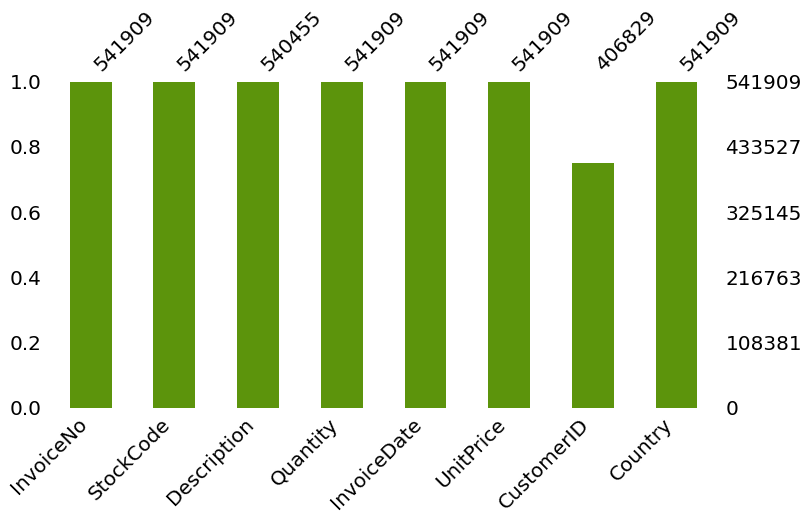

In [ ]:
import missingno as msno
msno.bar(df, color = '#5c940c', figsize=(12,6), fontsize=20)


plt.savefig('/content/drive/MyDrive/Modulo7/Tarea/missings.png')

In [12]:
# Outliers

def outliers(variables):
  sns.boxplot(data = df, x = variables, orient = 'h')
  
  return
  

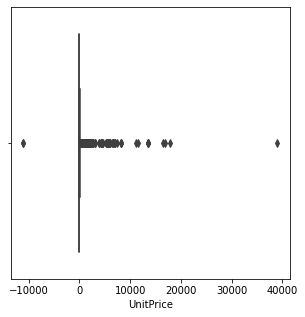

In [13]:
plt.figure(figsize=(5,5))
outliers('UnitPrice')

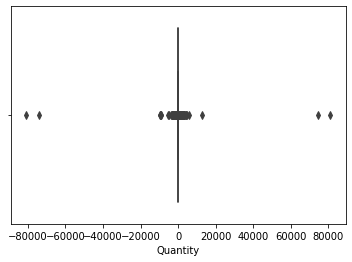

In [11]:
outliers('Quantity')



*   Para ambos variables (Quantity y UnitPrice) hay outliers. 
*   Tambien hay valores negativos. Hay que averiguar que esta sucediendo aquí. 



### Comenzar preprocesamiento

In [ ]:
# Unit Price 

In [14]:
df['UnitPrice'].describe() 

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [15]:
df.loc[df['UnitPrice'] <0] # Hay dos registros con UnitPrice negativo, se tratan de registros para Ajustar deuda incobrable .  

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [16]:
# Quantity

df['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [17]:
df.loc[df['Quantity'] <0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
# Las 10624 observaciones que tieien un valor negativo para cantidad son productos devueltos. 
# Estas observaciones se remueven de la base de datos, y se van a guardar en una base de datos seperada.

In [18]:
returns = df.loc[df['Quantity'] <0]

In [19]:
df = df.loc[~df['Quantity'] <0]

In [ ]:
# Missings 

# por ahora vamos a botar los missings

In [20]:
df = df.dropna()

In [ ]:
# Missings y UnitPrice

In [21]:
df['UnitPrice'].describe() # al haber removido los np.nan el valor en UnitPrice que es negativo se ha removido

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [22]:
df.loc[df['UnitPrice'] <0] # No hay registros menor a 0. 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
# Date time

In [23]:
df['InvoiceDate_new'] = pd.to_datetime(df['InvoiceDate'])

In [24]:
df['Invoice_DayofWeek'] = df['InvoiceDate_new'].dt.dayofweek

In [25]:
df['Invoice_Hour'] = df['InvoiceDate_new'].dt.hour

In [26]:
df['Invoice_month'] = df['InvoiceDate_new'].dt.month

In [27]:
df["Invoice_Time"] = df["InvoiceDate_new"].dt.strftime('%H:%M')

In [28]:
df["Invoice_Day"] = df["InvoiceDate_new"].dt.strftime('%Y-%m-%d')

In [ ]:
# CustomerID se convierte a object

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          397924 non-null  object        
 1   StockCode          397924 non-null  object        
 2   Description        397924 non-null  object        
 3   Quantity           397924 non-null  int64         
 4   InvoiceDate        397924 non-null  object        
 5   UnitPrice          397924 non-null  float64       
 6   CustomerID         397924 non-null  float64       
 7   Country            397924 non-null  object        
 8   InvoiceDate_new    397924 non-null  datetime64[ns]
 9   Invoice_DayofWeek  397924 non-null  int64         
 10  Invoice_Hour       397924 non-null  int64         
 11  Invoice_month      397924 non-null  int64         
 12  Invoice_Time       397924 non-null  object        
 13  Invoice_Day        397924 non-null  object  

In [ ]:
# Despues del preprocesamiento hay 14 variables y 397924 registros. 

## 4) Analisis / Resultados

a. ¿Existen productos favoritos que compran los clientes?   
b. ¿Existe algún horario específico en el que los clientes compran? ¿En qué horario sugeriría refuerzo en los servidores de la tienda para evitar un colapso?   
c. ¿Qué frecuencia de compra tiene un cliente de alta frecuencia? ¿ Cuánto debería gastar un cliente para considerarlo sobre la media?   
d. ¿Cómo se distribuyen las antigüedades de los clientes?   
e. Si se clasifican en 3 grupos a los clientes, en base a su frecuencia de compra ¿Qué diferencias existen entre cada clúster? (Utilice el algoritmo de clusterización Kmeans). 

### Existen productos favoritos que compran los clientes? 

In [ ]:
# Existen productos favoritos que compran los clientes? 

In [30]:
df['StockCode'].nunique()  # hay 3665 productos. 

3665

In [31]:
StockCode_Quantity = df.groupby(['StockCode']).sum('Quantity').sort_values('Quantity', ascending = False)['Quantity']

In [32]:
StockCode_Quantity

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
          ...  
22323         1
90152C        1
90152B        1
90125E        1
47503J        1
Name: Quantity, Length: 3665, dtype: int64

In [33]:
StockCode_Quantity = StockCode_Quantity.to_frame()

In [34]:
StockCode_Quantity = StockCode_Quantity.reset_index()

In [35]:
StockCode_Quantity['Percentage'] = StockCode_Quantity['Quantity'] / StockCode_Quantity['Quantity'].sum() *100

In [36]:
StockCode_Quantity

,StockCode,Quantity,Percentage
0,23843,80995,1.563098
1,23166,77916,1.503678
2,84077,54415,1.050139
3,22197,49183,0.949168
4,85099B,46181,0.891233
...,...,...,...
3660,22323,1,0.000019
3661,90152C,1,0.000019
3662,90152B,1,0.000019
3663,90125E,1,0.000019


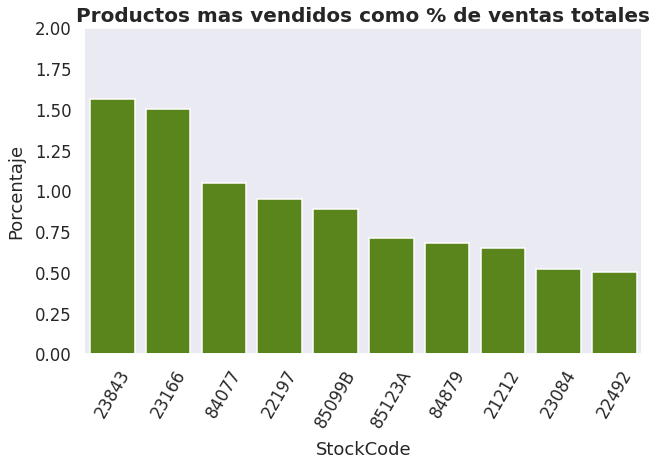

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.set(style="dark", context="talk")
bar = sns.barplot(data = StockCode_Quantity.iloc[:10].reset_index(), x = 'StockCode', y = 'Percentage', color = '#5d960b')
plt.xticks(rotation=60)
plt.ylim([0,2])
bar.set_title('Productos mas vendidos como % de ventas totales',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
bar.set_xlabel('StockCode',fontsize = 18, labelpad = 10)
bar.set_ylabel('Porcentaje',fontsize = 18, labelpad = 10)
plt.savefig('/content/drive/MyDrive/Modulo7/Tarea/pergunta1.png')

###  ¿Existe algún horario específico en el que los clientes compran? ¿En qué horario sugeriría refuerzo en los servidores de la tienda para evitar un colapso?

In [ ]:
 # ¿Existe algún horario específico en el que los clientes compran? ¿En qué horario sugeriría refuerzo en los servidores de la tienda para evitar un colapso?

In [ ]:
df.groupby(['Invoice_Hour', 'InvoiceNo']).count().reset_index().groupby(['Invoice_Hour']).count()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_new,Invoice_DayofWeek,Invoice_month,Invoice_Time,Invoice_Day
Invoice_Hour,,,,,,,,,,,,,
6,1,1,1,1,1,1,1,1,1,1,1,1,1
7,29,29,29,29,29,29,29,29,29,29,29,29,29
8,555,555,555,555,555,555,555,555,555,555,555,555,555
9,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394
10,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226
11,2277,2277,2277,2277,2277,2277,2277,2277,2277,2277,2277,2277,2277
12,3130,3130,3130,3130,3130,3130,3130,3130,3130,3130,3130,3130,3130
13,2637,2637,2637,2637,2637,2637,2637,2637,2637,2637,2637,2637,2637
14,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275


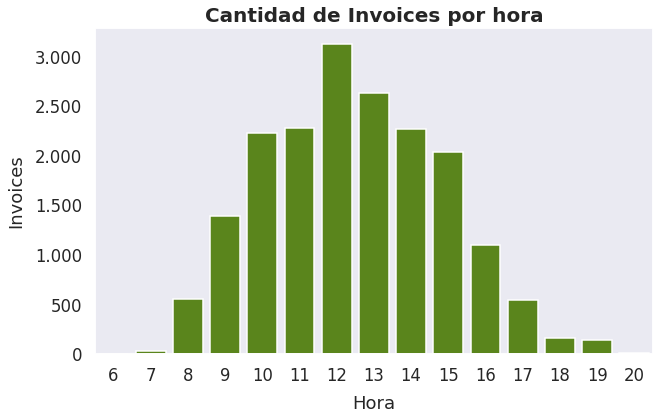

In [ ]:
Invoice_count_hour = df.groupby(['Invoice_Hour', 'InvoiceNo']).count().reset_index().groupby(['Invoice_Hour']).count().reset_index()
plt.figure(figsize=(10,6))
sns.set(style="dark", context="talk")
sns.barplot(data = Invoice_count_hour, x = 'Invoice_Hour', y = 'InvoiceNo', color = '#5d960b')
plt.xlabel('Hora', labelpad=10, fontsize = 18)
plt.ylabel('Invoices', labelpad=10, fontsize = 18)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(format_string))
plt.title('Cantidad de Invoices por hora', fontdict= {'fontsize': 20, 'fontweight':'bold'})
plt.savefig('/content/drive/MyDrive/Modulo7/Tarea/final3.png')

In [ ]:
# Se aconsejaría refuerzas en las tiendas entre 10am - 3pm. 

In [ ]:
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


In [168]:
# funcion para poner seperador (.) de miles en etiquetas de los ejes en el grafico. 
def format_string(x, pos):
        tick_str = ""
        x = str(int(x))
        count = 1
        for i in range(len(x), -1, -1):
            if count % 3 == 0 and len(x) > 3 and (i-1) != 0 and (i-1) != -1:
                tick_str = "." + x[i-1] + tick_str
            elif (i-1) != -1:
                tick_str = x[i-1] + tick_str
            count = count + 1

        return tick_str

## Frecuencia de compra

In [ ]:
# ¿Qué frecuencia de compra tiene un cliente de alta frecuencia? 
# ¿ Cuánto debería gastar un cliente para considerarlo sobre la media?   

In [37]:
df['CustomerID'].nunique() # 4339 clientes

4339

In [38]:
x = df.groupby(['CustomerID', 'InvoiceNo']).count().reset_index().groupby('CustomerID').count()

In [39]:
x

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceDate_new,Invoice_DayofWeek,Invoice_Hour,Invoice_month,Invoice_Time,Invoice_Day
CustomerID,,,,,,,,,,,,,
12346.0,1,1,1,1,1,1,1,1,1,1,1,1,1
12347.0,7,7,7,7,7,7,7,7,7,7,7,7,7
12348.0,4,4,4,4,4,4,4,4,4,4,4,4,4
12349.0,1,1,1,1,1,1,1,1,1,1,1,1,1
12350.0,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,1,1,1,1,1,1,1,1,1,1,1,1,1
18281.0,1,1,1,1,1,1,1,1,1,1,1,1,1
18282.0,2,2,2,2,2,2,2,2,2,2,2,2,2


In [40]:
# clientes con fecuencia de 1. 
una_vez = x[x['Invoice_Day'] == 1].shape[0]

print(una_vez / 4339 *100,'% tiene una frecuencia de 1.')

34.43189675040332 % tiene una frecuencia de 1.


In [41]:
# clientes con frecuencia de 1,2,3 veces. 
una_tres_veces = x[x['Invoice_Day'].isin([1,2,3])].shape[0]

print(una_tres_veces / 4339 *100,'% tiene una frecuencia de 1,2,3 veces.')

65.38372896980871 % tiene una frecuencia de 1,2,3 veces.


In [42]:
# filtrar 10% de clientes con mas frecuencia: 

x.sort_values(by = 'Invoice_Day', ascending = False).iloc[0:434,:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceDate_new,Invoice_DayofWeek,Invoice_Hour,Invoice_month,Invoice_Time,Invoice_Day
CustomerID,,,,,,,,,,,,,
12748.0,210,210,210,210,210,210,210,210,210,210,210,210,210
14911.0,201,201,201,201,201,201,201,201,201,201,201,201,201
17841.0,124,124,124,124,124,124,124,124,124,124,124,124,124
13089.0,97,97,97,97,97,97,97,97,97,97,97,97,97
14606.0,93,93,93,93,93,93,93,93,93,93,93,93,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16954.0,9,9,9,9,9,9,9,9,9,9,9,9,9
17049.0,9,9,9,9,9,9,9,9,9,9,9,9,9
15628.0,9,9,9,9,9,9,9,9,9,9,9,9,9


In [43]:
x.sort_values(by = 'Invoice_Day', ascending = False).iloc[0:434,:].describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceDate_new,Invoice_DayofWeek,Invoice_Hour,Invoice_month,Invoice_Time,Invoice_Day
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,18.532258,18.532258,18.532258,18.532258,18.532258,18.532258,18.532258,18.532258,18.532258,18.532258,18.532258,18.532258,18.532258
std,18.269730,18.269730,18.269730,18.269730,18.269730,18.269730,18.269730,18.269730,18.269730,18.269730,18.269730,18.269730,18.269730
min,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
25%,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
50%,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
75%,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
max,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000


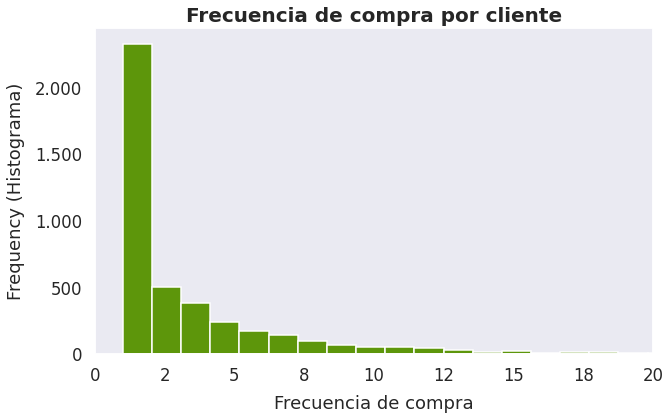

In [ ]:
plt.figure(figsize=(10,6))
x['Invoice_Day'].plot.hist(bins = 200, color = '#5d960b')
plt.xlabel('Frecuencia de compra', labelpad=10, fontsize = 18)
plt.title('Frecuencia de compra por cliente', fontdict= {'fontsize': 20, 'fontweight':'bold'})
plt.xlim((0,20))
plt.ylabel('Frequency (Histograma)', labelpad=10, fontsize = 18)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(format_string))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

plt.savefig('/content/drive/MyDrive/Modulo7/Tarea/pergunta3.png')

### ¿Qué frecuencia de compra tiene un cliente de alta frecuencia? ¿ Cuánto debería gastar un cliente para considerarlo sobre la media?   

In [ ]:
# ¿Qué frecuencia de compra tiene un cliente de alta frecuencia? 
# ¿ Cuánto debería gastar un cliente para considerarlo sobre la media?   

In [44]:
# Crear Nueva columna 'Total_gastado' = Quantity * Unitprice 

df['Total_gastado'] = df['Quantity'] * df['UnitPrice']

In [45]:
numero_visitas = df.groupby(['CustomerID', 'InvoiceNo']).count().reset_index().groupby('CustomerID').count()['Invoice_Day']

In [46]:
numero_visitas

CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: Invoice_Day, Length: 4339, dtype: int64

In [47]:
Total_gastado = df.groupby(['CustomerID']).agg('sum')['Total_gastado']

In [48]:
Total_gastado

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: Total_gastado, Length: 4339, dtype: float64

In [49]:
promedio_gastado = pd.concat([Total_gastado, numero_visitas], axis = 1)

In [50]:
promedio_gastado = promedio_gastado.rename(columns={'Invoice_Day':'Numero_visitas'})

In [51]:
# Promedio gastado cada visita

promedio_gastado['promedio_gastado'] = promedio_gastado['Total_gastado'] / promedio_gastado['Numero_visitas']


In [52]:
promedio_gastado

,Total_gastado,Numero_visitas,promedio_gastado
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4310.00,7,615.714286
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000
...,...,...,...
18280.0,180.60,1,180.600000
18281.0,80.82,1,80.820000
18282.0,178.05,2,89.025000


In [53]:
promedio_gastado['Total_gastado'].describe()

count      4339.000000
mean       2053.793018
std        8988.248381
min           0.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: Total_gastado, dtype: float64

In [54]:
promedio_gastado['promedio_gastado'].describe()

count     4339.000000
mean       419.047702
std       1796.320814
min          0.000000
25%        178.505000
50%        293.690000
75%        430.022500
max      84236.250000
Name: promedio_gastado, dtype: float64

(0.0, 2000.0)

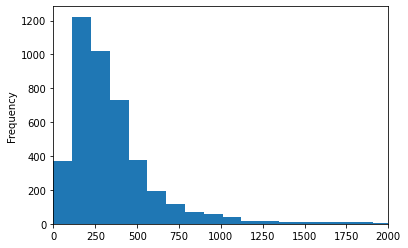

In [60]:
promedio_gastado['promedio_gastado'].plot.hist(bins = 750) #right skewed (positive skew)
plt.xlim([0,2000])

(0.0, 5000.0)

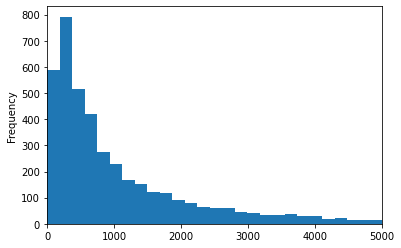

In [68]:
promedio_gastado['Total_gastado'].plot.hist(bins = 1500) #right skewed (positive skew)
plt.xlim([0,5000])

(0.0, 50.0)

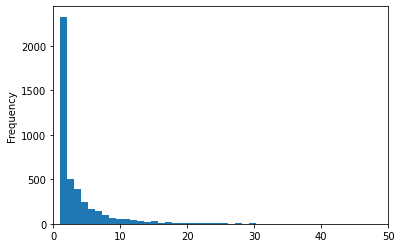

In [75]:
promedio_gastado['Numero_visitas'].plot.hist(bins = 200) #right skewed (positive skew)
plt.xlim([0,50])

In [86]:
promedio_gastado.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Total_gastado     4339 non-null   float64
 1   Numero_visitas    4339 non-null   int64  
 2   promedio_gastado  4339 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 135.6 KB


In [ ]:
# Transformaciones Log

In [115]:
promedio_gastado['Numero_visitas_Shift'] = promedio_gastado['Numero_visitas'] + 2

In [116]:
promedio_gastado['Numero_visitas_transformed_log'] = np.log(promedio_gastado['Numero_visitas_Shift'])

In [117]:
promedio_gastado['Total_gastado_Shift'] = promedio_gastado['Total_gastado'] + 2

In [118]:
promedio_gastado['Total_gastado_transformed_log'] = np.log(promedio_gastado['Total_gastado_Shift'])

In [119]:
promedio_gastado

,Total_gastado,Numero_visitas,promedio_gastado,Total_gastado_transformed_log,Numero_visitas_transformed_log,Numero_visitas_transformed_Reciprocal_1/x,Total_gastados_transformed_Reciprocal_1/x,Numero_visitas_Shift,Total_gastado_Shift
CustomerID,,,,,,,,,
12346.0,77183.60,1,77183.600000,11.253968,1.098612,2.000000,1.000000,3,77185.60
12347.0,4310.00,7,615.714286,8.369157,2.197225,1.002915,1.000000,9,4312.00
12348.0,1797.24,4,449.310000,7.495120,1.791759,1.015625,1.000000,6,1799.24
12349.0,1757.55,1,1757.550000,7.472813,1.098612,2.000000,1.000000,3,1759.55
12350.0,334.40,1,334.400000,5.818301,1.098612,2.000000,1.000000,3,336.40
...,...,...,...,...,...,...,...,...,...
18280.0,180.60,1,180.600000,5.207298,1.098612,2.000000,1.000000,3,182.60
18281.0,80.82,1,80.820000,4.416670,1.098612,2.000000,1.000002,3,82.82
18282.0,178.05,2,89.025000,5.193235,1.386294,1.125000,1.000000,4,180.05


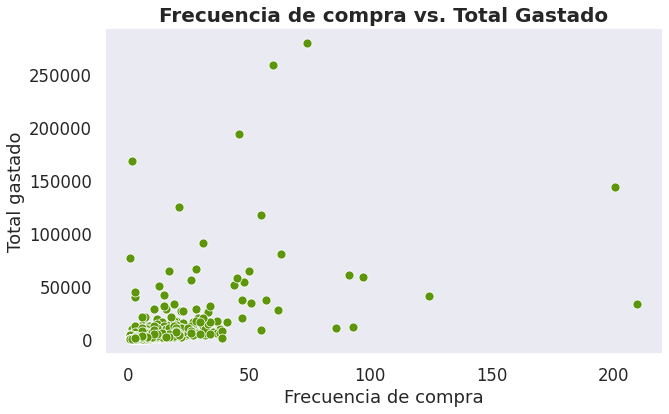

In [123]:
# Grafico sin transformaciones log
plt.figure(figsize=(10,6))
sns.scatterplot(data = promedio_gastado, x = 'Numero_visitas', y = 'Total_gastado', color = '#5d960b')
plt.ylabel('Total gastado')
plt.xlabel('Frecuencia de compra')
plt.title('Frecuencia de compra vs. Total Gastado', fontdict= {'fontsize': 20, 'fontweight':'bold'})
plt.savefig('/content/drive/MyDrive/Modulo7/Tarea/pergunta4.png')

In [ ]:
# Se sabe que las variables tienen right skewed (positive skew). Por lo tanto se aplicará una transformación de log para visualizarlas mejor. 

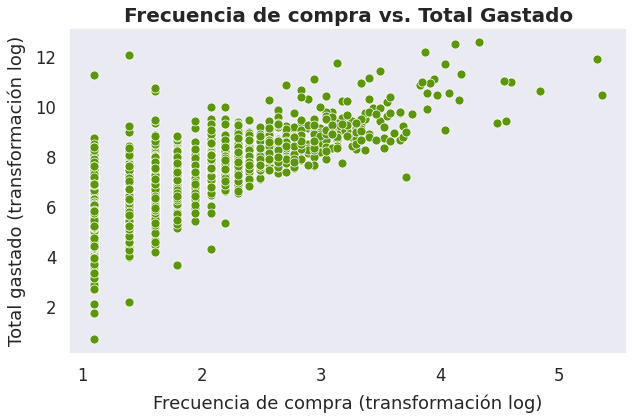

In [122]:
plt.figure(figsize=(10,6))
sns.set(style="dark", context="talk")
sns.scatterplot(data = promedio_gastado, x = 'Numero_visitas_transformed_log', y = 'Total_gastado_transformed_log', color = '#5d960b')
plt.ylabel('Total gastado (transformación log)', labelpad=10, fontsize = 18)
plt.xlabel('Frecuencia de compra (transformación log)', labelpad=10, fontsize = 18)
plt.title('Frecuencia de compra vs. Total Gastado', fontdict= {'fontsize': 20, 'fontweight':'bold'})
plt.savefig('/content/drive/MyDrive/Modulo7/Tarea/pergunta4.png')

### Cómo se distribuyen las antigüedades de los clientes?


In [ ]:
# d. ¿Cómo se distribuyen las antigüedades de los clientes?   

In [124]:
df.sort_values(['InvoiceDate_new']).groupby(['CustomerID']).count()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceDate_new,Invoice_DayofWeek,Invoice_Hour,Invoice_month,Invoice_Time,Invoice_Day,Total_gastado
CustomerID,,,,,,,,,,,,,,
12346.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
12347.0,182,182,182,182,182,182,182,182,182,182,182,182,182,182
12348.0,31,31,31,31,31,31,31,31,31,31,31,31,31,31
12349.0,73,73,73,73,73,73,73,73,73,73,73,73,73,73
12350.0,17,17,17,17,17,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10
18281.0,7,7,7,7,7,7,7,7,7,7,7,7,7,7
18282.0,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [125]:
CustomerID = df['CustomerID'].unique().tolist()

In [180]:
import datetime
CustomerID = df['CustomerID'].unique().tolist()
cliente_list = []
primer_compra_list = []
ultima_compra_list = []
final_dia = datetime.datetime.strptime('2011-12-10', '%Y-%m-%d').date()

for cliente in CustomerID:
  primer_compra = df[df['CustomerID'] == cliente].iloc[0,13]
  cliente_list.append(cliente)
  primer_compra_list.append(primer_compra)
  antigüedades = pd.DataFrame({'cliente': cliente_list,
                'primera compra': primer_compra_list})
  antigüedades['final_day'] = final_dia
  Start = pd.to_datetime(antigüedades['primera compra'])
  End = pd.to_datetime(antigüedades['final_day'])
  antigüedades['dias_desde_primera_compra'] = End.subtract(Start)
  ultima_compra = df[df['CustomerID'] == cliente].iloc[-1,13]
  ultima_compra_list.append(ultima_compra)
  antigüedades = antigüedades.assign(Ultima_compra = ultima_compra_list)
  Start_ultima_compra = pd.to_datetime(antigüedades['Ultima_compra'])
  antigüedades['dias_desde_ultima_compra'] = End.subtract(Start_ultima_compra)


In [181]:
antigüedades

,cliente,primera compra,final_day,dias_desde_primera_compra,Ultima_compra,dias_desde_ultima_compra
0,17850.0,2010-12-01,2011-12-10,374 days,2010-12-02,373 days
1,13047.0,2010-12-01,2011-12-10,374 days,2011-11-08,32 days
2,12583.0,2010-12-01,2011-12-10,374 days,2011-12-07,3 days
3,13748.0,2010-12-01,2011-12-10,374 days,2011-09-05,96 days
4,15100.0,2010-12-01,2011-12-10,374 days,2011-01-10,334 days
...,...,...,...,...,...,...
4334,13436.0,2011-12-08,2011-12-10,2 days,2011-12-08,2 days
4335,15520.0,2011-12-08,2011-12-10,2 days,2011-12-08,2 days
4336,13298.0,2011-12-08,2011-12-10,2 days,2011-12-08,2 days
4337,14569.0,2011-12-08,2011-12-10,2 days,2011-12-08,2 days


In [ ]:
antigüedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   cliente                    4339 non-null   object         
 1   primera compra             4339 non-null   object         
 2   final_day                  4339 non-null   object         
 3   dias_desde_primera_compra  4339 non-null   timedelta64[ns]
 4   Ultima_compra              4339 non-null   object         
 5   dias_desde_ultima_compra   4339 non-null   timedelta64[ns]
dtypes: object(4), timedelta64[ns](2)
memory usage: 203.5+ KB


In [ ]:
antigüedades['dias_desde_primera_compra'] = antigüedades['dias_desde_primera_compra'].dt.days
antigüedades['dias_desde_ultima_compra'] = antigüedades['dias_desde_ultima_compra'].dt.days

In [ ]:
antigüedades['dias_desde_primera_compra'].describe()

count    4339.000000
mean      223.782899
std       117.883623
min         1.000000
25%       113.000000
50%       249.000000
75%       327.000000
max       374.000000
Name: dias_desde_primera_compra, dtype: float64

<Figure size 720x432 with 0 Axes>

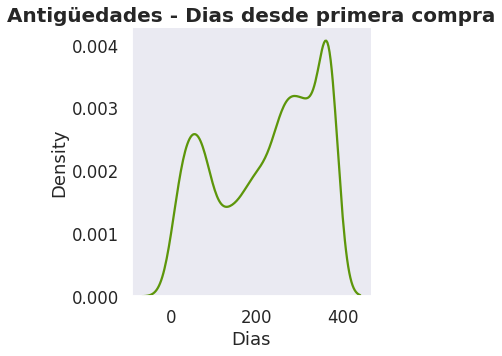

In [ ]:
plt.figure(figsize=(10,6))
sns.set(style="dark", context="talk")
sns.displot(antigüedades, x="dias_desde_primera_compra", kind="kde", color = '#5d960b')
plt.xlabel('Dias')
plt.title('Antigüedades - Dias desde primera compra', fontdict= {'fontsize': 20, 'fontweight':'bold'})
plt.savefig('/content/drive/MyDrive/Modulo7/Tarea/pergunta4.png')

In [ ]:
antigüedades['dias_desde_ultima_compra'].describe()

count    4339.000000
mean       93.041484
std       100.007757
min         1.000000
25%        18.000000
50%        51.000000
75%       142.500000
max       374.000000
Name: dias_desde_ultima_compra, dtype: float64

<Figure size 720x432 with 0 Axes>

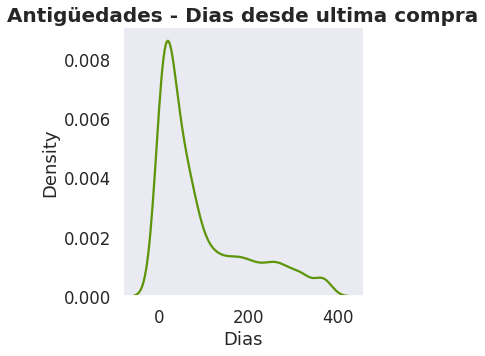

In [ ]:
plt.figure(figsize=(10,6))
sns.set(style="dark", context="talk")
sns.displot(antigüedades, x="dias_desde_ultima_compra", kind="kde", color = '#5d960b')
plt.xlabel('Dias')
plt.title('Antigüedades - Dias desde ultima compra', fontdict= {'fontsize': 20, 'fontweight':'bold'})
plt.savefig('/content/drive/MyDrive/Modulo7/Tarea/pergunta4.png')

### Si se clasifican en 3 grupos a los clientes, en base a su frecuencia de compra ¿Qué diferencias existen entre cada clúster? (Utilice el algoritmo de clusterización Kmeans). 

In [ ]:
# Si se clasifican en 3 grupos a los clientes, en base a su frecuencia de compra 
# ¿Qué diferencias existen entre cada clúster? (Utilice el algoritmo de clusterización Kmeans). 

In [ ]:
# frequencia de comprar para cada client

# compras / 1 tomar el promedio para un mes 

In [140]:
x = df.groupby(['CustomerID', 'InvoiceNo']).count().reset_index().groupby('CustomerID').count()
x

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceDate_new,Invoice_DayofWeek,Invoice_Hour,Invoice_month,Invoice_Time,Invoice_Day,Total_gastado
CustomerID,,,,,,,,,,,,,,
12346.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
12347.0,7,7,7,7,7,7,7,7,7,7,7,7,7,7
12348.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4
12349.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
12350.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
18281.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
18282.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [141]:
from sklearn.preprocessing import StandardScaler
#estandarizar las viariables, promedio = 0 y desviacion estandard = 1
scaler = StandardScaler()
new_scaled = scaler.fit_transform(x['InvoiceNo'].to_numpy().reshape(-1, 1))
new_scaled

array([[-0.42467487],
       [ 0.35408019],
       [-0.03529734],
       ...,
       [-0.29488236],
       [ 1.52221279],
       [-0.16508985]])

In [142]:
new_scaled = pd.DataFrame(new_scaled, index=x.index)

In [143]:
from sklearn.cluster import KMeans
kmeans = KMeans(
     init="random",
    n_clusters=3,
    n_init=10,
    max_iter=500,
    random_state=42)

In [144]:
kmeans.fit(new_scaled)

KMeans(init='random', max_iter=500, n_clusters=3, random_state=42)

In [145]:
kmeans.labels_[:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,

In [146]:
new_scaled['grupo'] = kmeans.labels_

In [147]:
new_scaled['grupo'].value_counts()

0    4002
2     329
1       8
Name: grupo, dtype: int64

In [150]:
new_scaled = new_scaled.rename(columns={0:'FrecuenciaCompra_scaled'})

In [151]:
new_scaled = new_scaled.reset_index()

In [152]:
new_scaled

,CustomerID,FrecuenciaCompra_scaled,grupo
0,12346.0,-0.424675,0
1,12347.0,0.354080,0
2,12348.0,-0.035297,0
3,12349.0,-0.424675,0
4,12350.0,-0.424675,0
...,...,...,...
4334,18280.0,-0.424675,0
4335,18281.0,-0.424675,0
4336,18282.0,-0.294882,0
4337,18283.0,1.522213,2


In [ ]:
# Comparando los grupos

In [153]:
group_cluster = new_scaled.groupby(['grupo'])['FrecuenciaCompra_scaled'].describe()


In [172]:
group_cluster

,count,mean,std,min,25%,50%,75%,max
grupo,,,,,,,,
0,4002.0,-0.184095,0.286275,-0.424675,-0.424675,-0.294882,-0.035297,0.743458
1,8.0,15.280219,6.940476,9.050178,11.094410,11.775821,18.038310,26.701960
2,329.0,1.867800,1.262288,0.873250,1.003043,1.392420,2.171175,7.622461


In [170]:
group_cluster['mean']

grupo
0    -0.184095
1    15.280219
2     1.867800
Name: mean, dtype: float64

In [171]:
group_cluster['count']

grupo
0    4002.0
1       8.0
2     329.0
Name: count, dtype: float64

In [173]:
pd.merge(df,new_scaled, on ='CustomerID').groupby('grupo')['Country'].value_counts()

grupo  Country             
0      United Kingdom          229965
       Germany                   6162
       France                    5843
       Spain                     2007
       Switzerland               1842
       Belgium                   1821
       Portugal                  1091
       Norway                    1072
       Italy                      758
       Channel Islands            748
       Finland                    685
       Cyprus                     614
       Austria                    398
       Denmark                    380
       Poland                     330
       Japan                      321
       Australia                  287
       Netherlands                283
       Sweden                     253
       Israel                     248
       Unspecified                244
       Singapore                  222
       Iceland                    182
       USA                        179
       EIRE                       161
       Canada         

In [162]:
pd.merge(df,new_scaled, on ='CustomerID').groupby('grupo')[['UnitPrice','Quantity','Total_gastado']].describe()

UnitPrice                            ... Total_gastado                        
          count      mean        std  min  ...           25%    50%   75%        max
grupo                                      ...                                      
0      256853.0  3.078103  18.270150  0.0  ...          4.68  11.25  17.7  168469.60
1       27402.0  3.016404  16.021408  0.0  ...          2.50   6.75  17.7    4992.00
2      113669.0  3.226255  29.885360  0.0  ...          5.10  14.85  23.4    8142.75

[3 rows x 24 columns]

In [176]:
pd.merge(df,new_scaled, on ='CustomerID').groupby('grupo')[['UnitPrice']].mean()

,UnitPrice
grupo,
0,3.078103
1,3.016404
2,3.226255


In [179]:
pd.merge(df,new_scaled, on ='CustomerID').groupby('grupo')[['Quantity']].mean()

,Quantity
grupo,
0,10.534921
1,15.020874
2,18.159463


In [178]:
pd.merge(df,new_scaled, on ='CustomerID').groupby('grupo')[['Total_gastado']].mean()

,Total_gastado
grupo,
0,17.599766
1,23.417366
2,32.983246


## Conclución - Insights

In [ ]:
# Productos con Stock code: 23843, 23166, 84077 son los mas populares. 
# 10am – 3pm es el horario mas popular. Se aconseja poner mas trabajadores en las tiendas en este horario.
# Por otro lado hay pocas compras antes de 9am y después de 5pm.
# 65% de los clientes tienen una frecuencia de compra de uno, dos, o tres veces. 
# El 10% de clientes con mas frecuencia de compra tienen un promedio de 19 veces.


In [ ]:
# La media gastado para cada cliente es $2.054, mientras la media para cada invoice es $419. 
# Hay un promedio de 224 días desde la primera compra de un cliente. 
# Promedio de 93 días desde ultima compra. 
# Tres grupos creados con clustering. Grupo 1 tiene un frecuencia de compra mas alta. Sugiere que los clientes en este grupo son mas fieles. 